In [1]:
import pandas as pd

# Define the name of the input CSV file
input_file = '/content/Final Dataset - IPR.csv'

# Load the CSV file into a pandas dataframe
df = pd.read_csv(input_file)

# Remove any rows that contain a value only in the last column
df = df[df.iloc[:, -1].notnull()]

In [2]:
df = df.dropna(axis=0, how='any')
df = df.reset_index(drop=True)

In [3]:
df

,patent_grant,patent_publish,IPR
0,476.0,212.0,15.0
1,10.0,0.0,15.0
2,320.0,205.0,15.0
3,192.0,91.0,12.0
4,44.0,12.0,10.0
...,...,...,...
118,32.0,8.0,4.0
119,4.0,0.0,0.0
120,6.0,4.0,0.5
121,3.0,0.0,0.0


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [5]:
# Split the dataframe into training and test sets
train_df, test_df = train_test_split(df, test_size=0.16, random_state=42)

# Select the columns to use for training and testing
X_train = train_df.iloc[:, :-1].values
y_train = train_df.iloc[:, -1].values
X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values


In [6]:
import pandas as pd

# Convert the X_test array to a DataFrame
X_test_df = pd.DataFrame(X_test, columns=df.columns[:-1])

# Print the DataFrame
X_test_df

,patent_grant,patent_publish
0,11.0,16.0
1,0.0,0.0
2,7.0,5.0
3,0.0,0.0
4,44.0,12.0
5,2.0,0.0
6,23.0,3.0
7,3.0,2.0
8,13.0,1.0
9,3.0,0.0


In [7]:
y_test

array([ 3. ,  0. ,  2.5,  0. , 10. ,  0.5,  2. ,  0.5,  1.5,  0. ,  3. ,
        0. ,  5. ,  2. ,  4.5,  3. ,  0.5,  2. ,  5. , 15. ])

In [14]:
# Fit a linear regression model on the training data
reg = LinearRegression()
reg.fit(X_train, y_train)
r2_score = reg.score(X_test, y_test)
# Print the evaluation metrics
print("Linear Regression R^2 Score: {:.2f}".format(r2_score))

# Fit a Ridge regression model on the training data
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
r2_score = ridge.score(X_test, y_test)
print("Ridge Regression R^2 Score: {:.2f}".format(r2_score))

# Fit a Lasso regression model on the training data
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
r2_score = lasso.score(X_test, y_test)
print("Lasso Regression R^2 Score: {:.2f}".format(r2_score))

# Fit an Elastic Net regression model on the training data
enet = ElasticNet(alpha=1.0, l1_ratio=0.5)
enet.fit(X_train, y_train)
r2_score = enet.score(X_test, y_test)
print("Elastic Net Regression R^2 Score: {:.2f}".format(r2_score))

# Fit a decision tree regression model on the training data
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_r2_score = dt.score(X_test, y_test)
print("Decision Tree Regression R^2 Score: {:.2f}".format(dt_r2_score))

# Fit a random forest regression model on the training data
rf = RandomForestRegressor(n_estimators=5, random_state=42)
rf.fit(X_train, y_train)
rf_r2_score = rf.score(X_test, y_test)
# Use the model to make predictions on the test data
y_pred = rf.predict(X_test)

# Calculate the RMSE and MAE
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

# Print the results
print("Random Forest Regressor:")
print("RMSE: {:.2f}".format(rmse))
print("MAE: {:.2f}".format(mae))
print("Random Forest Regression R^2 Score: {:.2f}".format(rf_r2_score))

Linear Regression R^2 Score: 0.55
Ridge Regression R^2 Score: 0.55
Lasso Regression R^2 Score: 0.56
Elastic Net Regression R^2 Score: 0.56
Decision Tree Regression R^2 Score: 0.85
Random Forest Regressor:
RMSE: 1.31
MAE: 0.90
Random Forest Regression R^2 Score: 0.87


In [18]:
# # Get the column names of the input variables from the original DataFrame
# input_cols = df.columns[:-1]

# # Prompt the user to enter input values for each column
# input_values = []
# for col in input_cols:
#     value = float(input("Enter value for {}: ".format(col)))
#     input_values.append(value)

# # Reshape the input values into a 2D array
# input_values = np.array(input_values).reshape(1, -1)

# # Use the trained model to make a prediction on the input values
# prediction = rf.predict(input_values)

# # Print the predicted value
# print("The predicted value is: {:.2f}".format(prediction[0]))

Enter value for patent_grant: 0
Enter value for patent_publish: 0
The predicted value is: 0.00


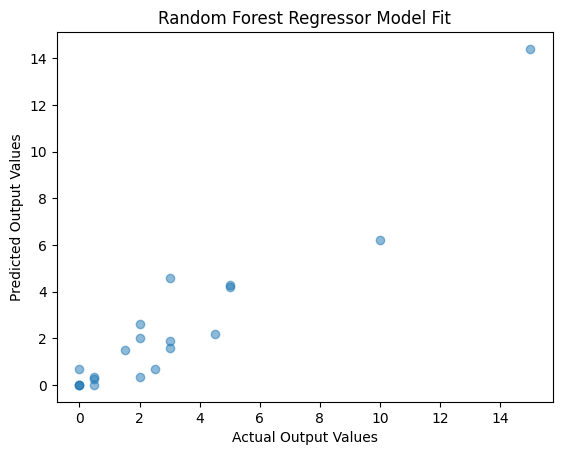

In [19]:
# import matplotlib.pyplot as plt

# # Use the trained model to make a prediction on the test input values
# y_pred = rf.predict(X_test)

# # Create a scatter plot of the predicted vs actual output values
# plt.scatter(y_test, y_pred, alpha=0.5)
# plt.xlabel("Actual Output Values")
# plt.ylabel("Predicted Output Values")
# plt.title("Random Forest Regressor Model Fit")
# plt.show()
